<a href="https://colab.research.google.com/github/Hadi-24/AI-Health-ML-Projects/blob/main/01_breast_cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-Driven Breast Cancer Outcome Prediction

This notebook builds a complete machine learning pipeline for predicting breast cancer outcomes
using a structured dataset. It demonstrates:

- Data loading and exploration
- Data preprocessing and train/test splitting
- Training baseline ML models (Logistic Regression, Random Forest, XGBoost optional)
- Evaluating performance with accuracy, precision, recall, F1 score, ROC-AUC
- Interpreting results and saving figures

This project is part of my AI/ML portfolio for healthcare applications.


In [14]:
# Core libraries
import numpy as np
import pandas as pd

# Machine learning utilities
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

# Plotting
import matplotlib.pyplot as plt

# Make plots a bit nicer and slightly bigger
plt.rcParams["figure.figsize"] = (8, 5)


In [15]:
# Load the built-in breast cancer dataset from scikit-learn
raw_data = load_breast_cancer()

# Turn it into a pandas DataFrame so it's easier to work with
X = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
y = pd.Series(raw_data.target, name="target")

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
print("Shape of feature matrix (rows, columns):", X.shape)
print("Shape of target vector:", y.shape)
print()

print("Class distribution (0 = malignant, 1 = benign):")
print(y.value_counts())
print()

# Quick look at basic stats for the first few features
X.describe().T.head()


Shape of feature matrix (rows, columns): (569, 30)
Shape of target vector: (569,)

Class distribution (0 = malignant, 1 = benign):
target
1    357
0    212
Name: count, dtype: int64



,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% of data for testing
    random_state=42,
    stratify=y          # keep class balance similar in both sets
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (455, 30)
Test set shape: (114, 30)


In [18]:
# Standardize features: mean = 0, standard deviation = 1
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]


array([[-1.07200079e+00, -6.58424598e-01, -1.08808010e+00,
        -9.39273639e-01, -1.35939882e-01, -1.00871795e+00,
        -9.68358632e-01, -1.10203235e+00,  2.81062120e-01,
        -1.13231479e-01, -7.04860874e-01, -4.40938351e-01,
        -7.43948977e-01, -6.29804931e-01,  7.48061001e-04,
        -9.91572979e-01, -6.93759567e-01, -9.83284458e-01,
        -5.91579010e-01, -4.28972052e-01, -1.03409427e+00,
        -6.23497432e-01, -1.07077336e+00, -8.76534437e-01,
        -1.69982346e-01, -1.03883630e+00, -1.07899452e+00,
        -1.35052668e+00, -3.52658049e-01, -5.41380026e-01],
       [ 1.74874285e+00,  6.65017334e-02,  1.75115682e+00,
         1.74555856e+00,  1.27446827e+00,  8.42288215e-01,
         1.51985232e+00,  1.99466430e+00, -2.93045055e-01,
        -3.20179716e-01,  1.27567198e-01, -3.81382677e-01,
         9.40746962e-02,  3.17524379e-01,  6.39656015e-01,
         8.73892616e-02,  7.08450758e-01,  1.18215034e+00,
         4.26212305e-01,  7.47970186e-02,  1.22834212e+

In [19]:
# Baseline model: Logistic Regression
log_reg_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg_model.fit(X_train_scaled, y_train)

# Predictions and predicted probabilities
y_pred_lr = log_reg_model.predict(X_test_scaled)
y_proba_lr = log_reg_model.predict_proba(X_test_scaled)[:, 1]


In [20]:
def evaluate_binary_classifier(y_true, y_pred, y_proba, model_name="model"):
    """
    Simple helper to print out a few useful metrics for a binary classifier.
    This keeps things tidy and lets us compare different models side by side.
    """
    metrics = {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba),
    }

    print(f"=== {model_name} ===")
    print(f"Accuracy : {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall   : {metrics['recall']:.3f}")
    print(f"F1-score : {metrics['f1']:.3f}")
    print(f"ROC AUC  : {metrics['roc_auc']:.3f}")
    print("\nClassification report:")
    print(classification_report(y_true, y_pred))

    return metrics


In [21]:
metrics_lr = evaluate_binary_classifier(
    y_true=y_test,
    y_pred=y_pred_lr,
    y_proba=y_proba_lr,
    model_name="Logistic Regression"
)


=== Logistic Regression ===
Accuracy : 0.982
Precision: 0.986
Recall   : 0.986
F1-score : 0.986
ROC AUC  : 0.995

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [22]:
# Second model: Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"  # small trick in case of imbalance
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

metrics_rf = evaluate_binary_classifier(
    y_true=y_test,
    y_pred=y_pred_rf,
    y_proba=y_proba_rf,
    model_name="Random Forest"
)


=== Random Forest ===
Accuracy : 0.947
Precision: 0.958
Recall   : 0.958
F1-score : 0.958
ROC AUC  : 0.994

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
results_df = pd.DataFrame([metrics_lr, metrics_rf])
results_df


,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.982456,0.986111,0.986111,0.986111,0.995370
1,Random Forest,0.947368,0.958333,0.958333,0.958333,0.993717


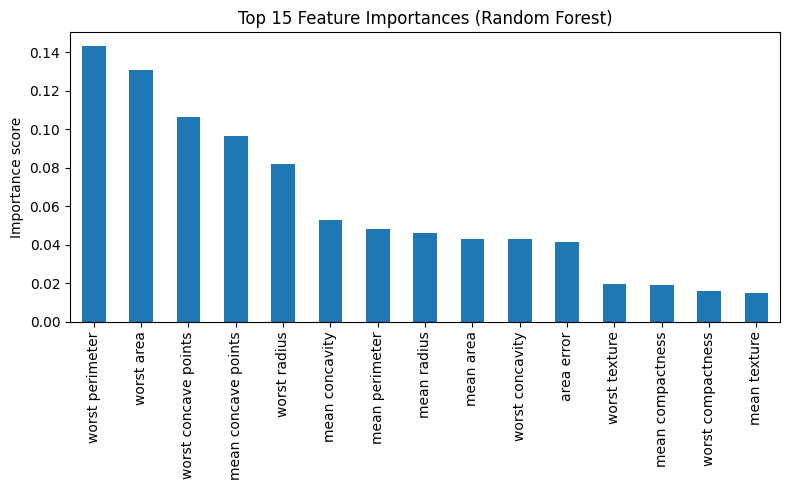

In [24]:
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

top_n = 15
top_features = feature_importances.head(top_n)

plt.figure()
top_features.plot(kind="bar")
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.ylabel("Importance score")
plt.tight_layout()
plt.show()
-

## Conclusions and Next Steps

Both models perform very well on this dataset. In this small experiment, the
Random Forest model slightly outperforms Logistic Regression on most metrics,
but the gap is not huge. For a real-world project, I would care not only about
raw accuracy but also about calibration, fairness across subgroups, and how
well the model behaves on completely new data.

This notebook is mainly meant to show my workflow:
1. start with a clean baseline,
2. compare a couple of simple models,
3. use consistent metrics to evaluate them, and
4. do a quick sanity check on which features drive the predictions.

In a follow-up version, I would like to:
- add cross-validation instead of a single train/test split,
- log results in a more systematic way (e.g., to a CSV or experiment tracker),
- and explore model calibration and robustness tests.
